In [1]:
# check installed version
import pycaret
pycaret.__version__

'3.0.2'

In [2]:
import pandas as pd
import os

base_dir = "../Data"
base_csv_path = os.path.join(base_dir, 'base_cleaned.csv')
assert os.path.exists(base_csv_path), f"base {base_csv_path} does not exist"

# Load the data
df = pd.read_csv(base_csv_path)

In [3]:
#Calculate the median in wl_time
median = df['wl_time'].median()

#Print the the median wainting time
print("The median waiting time is: ", median)

#Code wl_time to 0 if it is less than the median, otherwise 1
df['wl_time'] = df['wl_time'].apply(lambda x: 0 if x < median else 1)

The median waiting time is:  88.0


In [4]:
df.sample(5)

,thoracic_dgn,num_prev_tx,tah,vas,onvent,icu,inotropic,gender,abo,wgt_kg_tcr,...,prior_card_surg_tcr,histry_cig_old,init_stat,init_age,ethcat,init_hgt_cm_calc,init_wgt_kg_calc,ventilator_tcr,work_income_tcr,wl_time
58658,1.0,0,NaN,NaN,NaN,NaN,NaN,M,1,113.2000,...,Y,NaN,1.0,64.0,1,182.00,113.2000,0,N,0
31733,1.0,0,NaN,NaN,NaN,NaN,NaN,M,4,72.0000,...,Y,NaN,3.0,59.0,1,175.00,72.0000,0,N,1
37914,1.0,0,NaN,NaN,NaN,NaN,NaN,F,1,62.3000,...,Y,NaN,3.0,55.0,2,167.64,62.3000,0,N,1
17642,1.0,0,NaN,NaN,NaN,NaN,NaN,M,4,95.2543,...,Y,NaN,3.0,62.0,1,182.88,95.2543,0,N,0
5928,NaN,0,N,N,N,N,NaN,M,2,109.0000,...,U,NaN,3.0,60.0,1,178.00,109.0000,0,NaN,1


In [5]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df, target = 'wl_time', session_id = 123)

,Description,Value
0,Session id,123
1,Target,wl_time
2,Target type,Binary
3,Original data shape,"(65067, 34)"
4,Transformed data shape,"(65067, 44)"
5,Transformed train set shape,"(45546, 44)"
6,Transformed test set shape,"(19521, 44)"
7,Ordinal features,7
8,Numeric features,21
9,Categorical features,12


In [6]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7015,0.7685,0.7182,0.6962,0.7070,0.4030,0.4032,0.0990
catboost,CatBoost Classifier,0.7003,0.7681,0.7168,0.6951,0.7058,0.4005,0.4008,0.1420
gbc,Gradient Boosting Classifier,0.6999,0.7675,0.7192,0.6937,0.7062,0.3997,0.4000,0.1140
ada,Ada Boost Classifier,0.6967,0.7624,0.7146,0.6912,0.7027,0.3934,0.3937,0.1080
xgboost,Extreme Gradient Boosting,0.6928,0.7581,0.7072,0.6886,0.6978,0.3855,0.3857,0.0980
rf,Random Forest Classifier,0.6886,0.7513,0.6888,0.6898,0.6893,0.3772,0.3772,0.2360
lr,Logistic Regression,0.6882,0.7475,0.7082,0.6822,0.6949,0.3763,0.3766,0.3580
ridge,Ridge Classifier,0.6879,0.0000,0.7113,0.6807,0.6956,0.3756,0.3760,0.0780
lda,Linear Discriminant Analysis,0.6878,0.7476,0.7113,0.6807,0.6956,0.3756,0.3760,0.0740
et,Extra Trees Classifier,0.6815,0.7398,0.6825,0.6825,0.6824,0.3630,0.3630,0.4970


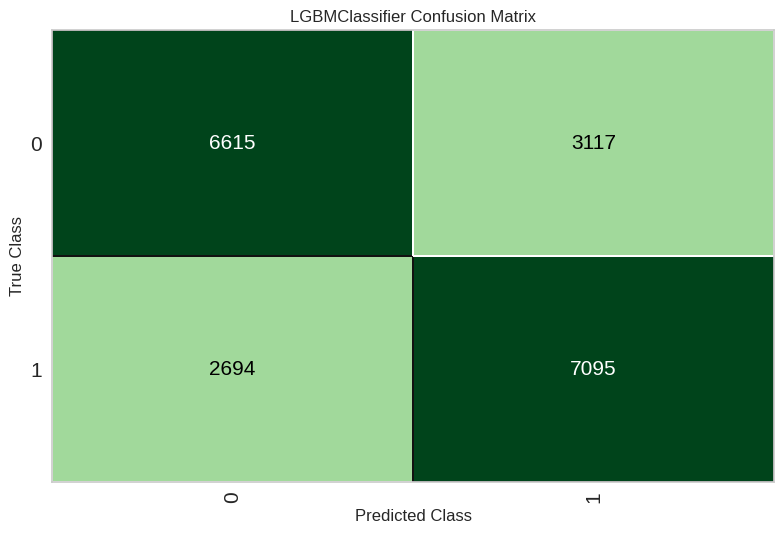

In [8]:
plot_model(best, plot = 'confusion_matrix')

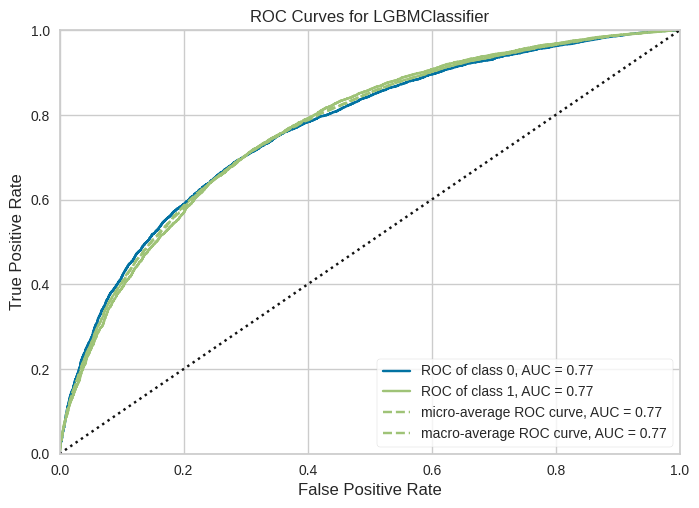

In [9]:
plot_model(best, plot = 'auc')

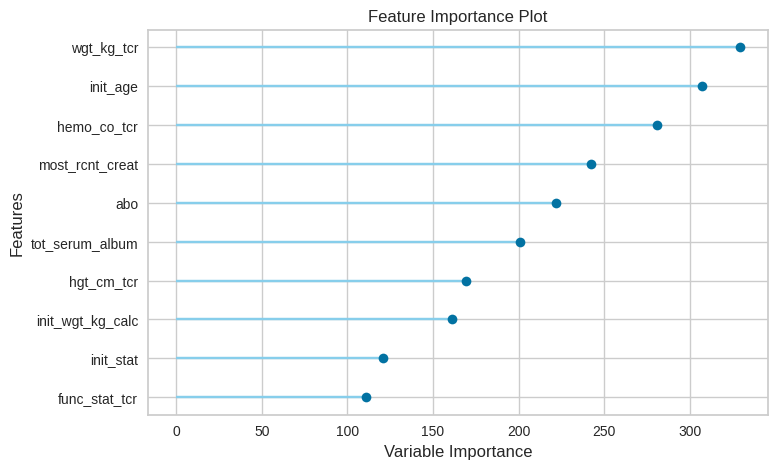

In [10]:
plot_model(best, plot = 'feature')